In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ncc(left_block, right_block):
    # 计算两个块之间的归一化互相关（NCC）
    product = np.mean((left_block - left_block.mean()) * (right_block - right_block.mean()))
    stds = left_block.std() * right_block.std()

    if stds == 0:
        return 0
    else:
        return product / stds

In [3]:
def compute_disparity_map(left_image, right_image, block_size, disparity_range):
    # 初始化视差图
    height, width = left_image.shape
    disparity_map = np.zeros((height, width), np.uint8)
    half_block_size = block_size // 2

    # 遍历图像中的每个像素
    for row in range(half_block_size, height - half_block_size):
        for col in range(half_block_size, width - half_block_size):
            best_disparity = 0
            best_similarity = -0x3f3f3f3f

            # 定义一个基于当前像素的left_block
            left_block = left_image[row - half_block_size:row + half_block_size + 1,
                         col - half_block_size:col + half_block_size + 1]

            # 遍历不同的视差
            for d in range(disparity_range):
                if col - d < half_block_size:
                    continue

                # 定义用于比较的right_block
                right_block = right_image[row - half_block_size:row + half_block_size + 1,
                              col - d - half_block_size:col - d + half_block_size + 1]

                # 计算相似性度量
                similarity = ncc(left_block, right_block)

 
                # NCC的值越大相似度乐感
                if similarity > best_similarity:
                    best_similarity = similarity
                    best_disparity = d

            # 将最佳视差赋给视差图
            disparity_map[row, col] = best_disparity * (256. / disparity_range)

    return disparity_map

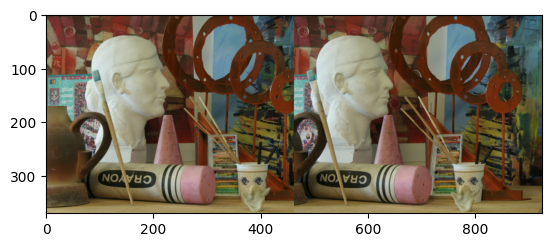

In [9]:
left_image_path = './assets/view1.png'
right_image_path = './assets/view5.png'

left_image = cv2.imread(left_image_path)
right_image = cv2.imread(right_image_path)

show_image = cv2.hconcat([left_image, right_image])
plt.imshow(cv2.cvtColor(show_image, cv2.COLOR_BGR2RGB))
plt.show()

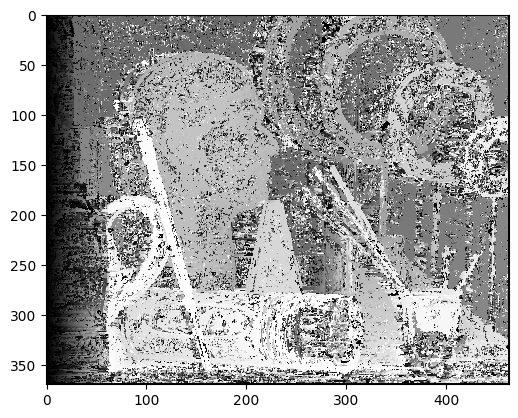

In [4]:
left_image = cv2.imread(left_image_path, cv2.IMREAD_GRAYSCALE)
right_image = cv2.imread(right_image_path, cv2.IMREAD_GRAYSCALE)


# 定义块大小和视差范围
block_size = 3
disparity_range = 64

# 使用选定的方法计算视差图
disparity_map = compute_disparity_map(left_image, right_image, block_size, disparity_range)

# 保存图像到文件
cv2.imwrite('./results/block3.png', disparity_map)

# 显示结果
plt.imshow(disparity_map, cmap='gray')
plt.show()

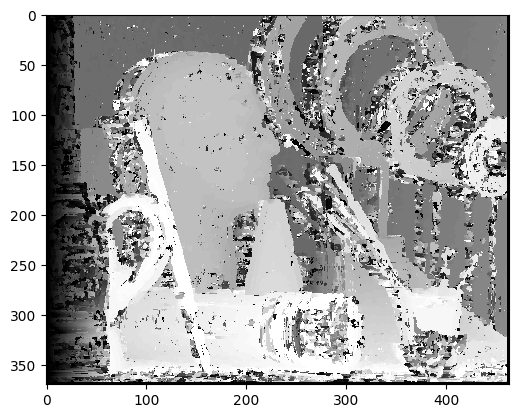

In [5]:
# 定义块大小和视差范围
block_size = 5
disparity_range = 64

# 使用选定的方法计算视差图
disparity_map = compute_disparity_map(left_image, right_image, block_size, disparity_range)

# 保存图像到文件
cv2.imwrite('./results/block5.png', disparity_map)

# 显示结果
plt.imshow(disparity_map, cmap='gray')
plt.show()

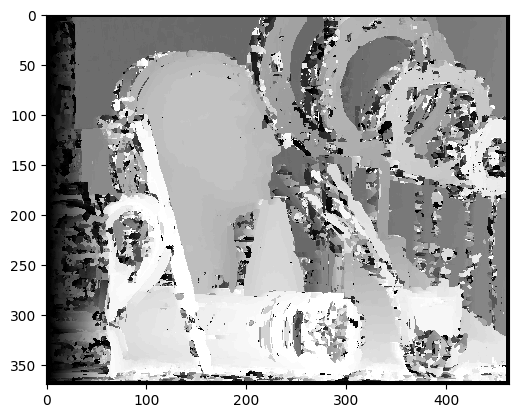

In [6]:
# 定义块大小和视差范围
block_size = 7
disparity_range = 64

# 使用选定的方法计算视差图
disparity_map = compute_disparity_map(left_image, right_image, block_size, disparity_range)

# 保存图像到文件
cv2.imwrite('./results/block7.png', disparity_map)

# 显示结果
plt.imshow(disparity_map, cmap='gray')
plt.show()

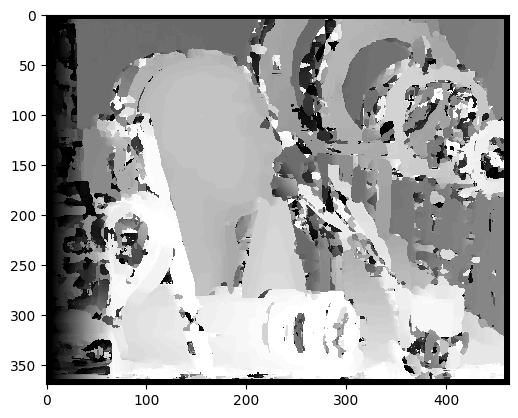

In [7]:
# 定义块大小和视差范围
block_size = 11
disparity_range = 64

# 使用选定的方法计算视差图
disparity_map = compute_disparity_map(left_image, right_image, block_size, disparity_range)

# 保存图像到文件
cv2.imwrite('./results/block11.png', disparity_map)

# 显示结果
plt.imshow(disparity_map, cmap='gray')
plt.show()